##Assignment 3
Name: Jonathan Au <br>
Student #: 300827701<br>

#Exercise 1: Using Data API - Loading and Preprocessing Data with TensorFlow

Using TensorFlow Data API, load data and perform the necessary preprocessing steps for the HYPE-Retention dataset:
  -	Loading data
  -	Converting categorical features to numerical
  -	Transformations
  -	Standardization

Note that all these tasks should be done after data cleaning.<br>
(3 marks)


Please use UCI Adult dataset for the Exercise-1:<br>
https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
!pip install ucimlrepo

In [ ]:
#All Imports
from ucimlrepo import fetch_ucirepo

import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
#from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
#X = adult.data.features
#y = adult.data.targets

X = pd.DataFrame(adult.data.features)
Y = pd.DataFrame(adult.data.targets)

# Print the description and shapes of the dataset
print(X.shape)
print(Y.shape)

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

#split into train and test data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=.665)

#split train data into train and validation data
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

#print the shapes of the data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(48842, 14)
(48842, 1)
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was 

Using TensorFlow Data API, load data and perform the necessary preprocessing steps for the HYPE-Retention dataset:
  -	Loading data
  -	Converting categorical features to numerical

In [ ]:
# Convert categorical features to numerical using OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
encoded_data = encoder.fit_transform(X[categorical_features])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate numerical and encoded features
X_encoded = pd.concat([X[numerical_features], encoded_df], axis=1)

# Convert target variable to numerical using LabelEncoder if it's categorical
if Y['income'].dtype == 'object':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(Y['income']) # Also, transform the column
else:
    y_encoded = Y

# variable information
print(y_encoded.dtype)

#dataset = tf.data.Dataset.from_tensor_slices((X,y))
dataset = tf.data.Dataset.from_tensor_slices((X_encoded.values, y_encoded))

def showTensor(dataset):
  # Iterate and print values
  for value in dataset:
    print(value)

#showTensor(dataset)

int64


  -	Transformations

In [ ]:
# Aply Transformation
dataset = dataset.repeat(3)
#showTensor(dataset)

  -	Standardization

In [ ]:
# create normalization layer
norm = Normalization(axis=None)
norm.adapt(dataset.map(lambda x, y: x))
norm(X_encoded.values)


<tf.Tensor: shape=(48842, 111), dtype=float32, numpy=
array([[-0.08182374,  3.689259  , -0.08308925, ..., -0.08372201,
        -0.08372201, -0.08372201],
       [-0.08128834,  3.9713225 , -0.08308925, ..., -0.08372201,
        -0.08372201, -0.08372201],
       [-0.08187242, 10.41254   , -0.08328395, ..., -0.08372201,
        -0.08372201, -0.08372201],
       ...,
       [-0.08187242, 18.168043  , -0.08308925, ..., -0.08372201,
        -0.08372201, -0.08372201],
       [-0.08158038,  3.9995532 , -0.08308925, ..., -0.08372201,
        -0.08372201, -0.08372201],
       [-0.08201844,  8.782073  , -0.08308925, ..., -0.08372201,
        -0.08372201, -0.08372201]], dtype=float32)>

#Exercise 2: Facial Recognition for Differentiating Specific Features – Using CNNs

Using TensorFlow, design and develop a CNN model for <b>differentiating people with mask and those without mask</b>. <br>Use the dataset of images uploaded on the Assignment 3 folder. <br>Follow the steps given in the referenced article also uploaded on the Assignment 3 folder.

Analyze the accuracy of the model and point out some of the pitfalls.

Your output should display the results of image classification in a friendly format.

(7 marks)


In [51]:
### Incomplete ###

#EX2 Imports
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Normalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

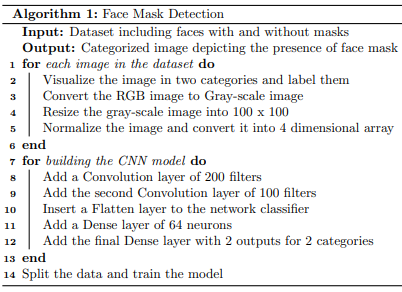

In [11]:
# Loading the database
path = './Dataset'
categories = os.listdir(path)
cat0 = ("./Dataset/without_mask")
cat1 = ("./Dataset/with_mask")

# Visualize the image in 2 categories and label them
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print (categories)
print (labels)
print (label_dict)

In [77]:
# Get a list of all image file paths
image_paths = []
for cat in categories:
  category_path = os.path.join(path, cat)
  for filename in os.listdir(category_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')): # Adjust file extensions if needed
      img_path = np.array(Image.open(os.path.join(category_path, filename)))
      image_paths.append(img_path)

  # Convert the RGB image to Gray-scale image
  for i in image_paths:
    # Load the image using cv2.imread
    img = cv2.imread("image", i)

    # Check if the image was loaded successfully
    if img is not None:
      # Convert the image to grayscale
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # Resize the image to 100 x 100
      img = cv2.resize(img, (100, 100))
      # Normalize the image and convert it to 4 dimensional array
      #i = np.reshape(img(image_paths[i],100, 100, 1))
      print(f"Successfully loaded image: {i}")

    else:
      print(f"Failed to load image: {i}")


['.ipynb_checkpoints', 'with_mask', 'without_mask']
[0, 1, 2]
{'.ipynb_checkpoints': 0, 'with_mask': 1, 'without_mask': 2}
Successfully loaded image: [[[128 157 101]
  [126 160 110]
  [118 160 124]
  ...
  [  0  72  63]
  [  0  63  57]
  [  6  67  62]]

 [[127 156 100]
  [126 160 110]
  [120 162 126]
  ...
  [  0  73  64]
  [  0  63  57]
  [  6  67  62]]

 [[126 154  96]
  [125 157 107]
  [120 162 124]
  ...
  [  0  73  64]
  [  0  62  56]
  [  5  66  61]]

 ...

 [[129 107  70]
  [129 107  70]
  [129 107  70]
  ...
  [134 139 158]
  [134 140 156]
  [134 140 156]]

 [[127 105  68]
  [127 105  68]
  [127 105  68]
  ...
  [133 138 157]
  [132 137 156]
  [132 137 156]]

 [[125 103  66]
  [125 103  66]
  [125 103  66]
  ...
  [133 138 157]
  [132 137 156]
  [131 136 155]]]
Successfully loaded image: [[[109 118 117]
  [110 119 118]
  [110 119 118]
  ...
  [ 27  66 123]
  [ 32  68 126]
  [ 24  56 117]]

 [[109 118 117]
  [110 119 116]
  [110 119 118]
  ...
  [ 65 105 154]
  [ 69 106 158]
  [